In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
n = 64
ex = (np.load("data/mwe/conditional_simulations1.npy")).reshape((n,n,2))


In [42]:
uncondex = np.load("data/mwe/unconditional_samples.npy").reshape((n,n,50))

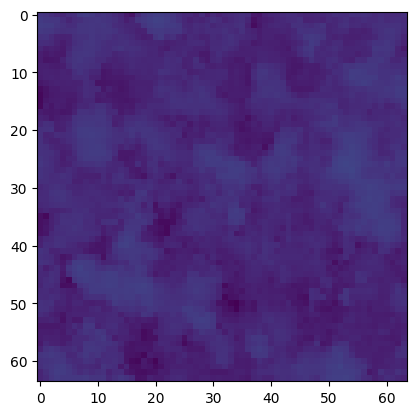

In [26]:
plt.imshow(ex[:,:,0], vmin = -2, vmax = 20)
plt.show()

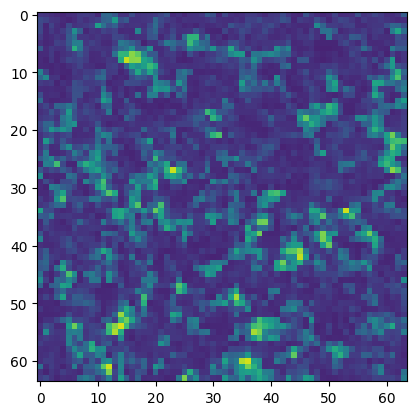

In [25]:
plt.imshow(ex[:,:,1], vmin = -2, vmax = 20)
plt.show()

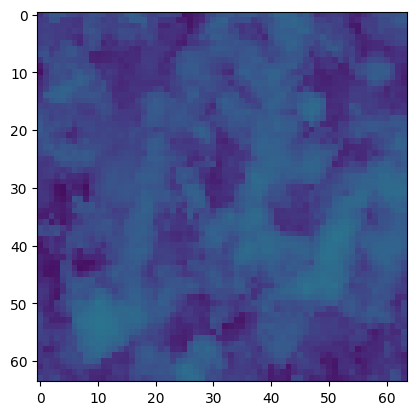

In [46]:
plt.imshow(uncondex[:,:,45], vmin = -2, vmax = 10)